# Visualizez ALAS1 combined expression (mean of expression level and read count) over time (1000 rows) to identify trends and the highest-expressing strain

In [1]:
#import and setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Load, normalize, and add time_min

In [2]:
df = pd.read_csv("dff.csv")
df.head()

# Add Time_min if not present
if 'Time_min' not in df.columns:
    df['Time_min'] = np.arange(0, 1000, 1) # 0 to 99 minutes

# Normalize the columns
df['Expression level'] = (df['Expression level'] - df['Expression level'].min()) / (df['Expression level'].max() - df['Expression level'].min())
df['Read count'] = (df['Read count'] - df['Read count'].min()) / (df['Read count'].max() - df['Read count'].min())

# Compute combind expression metric
df['Expression_combined'] = (df['Expression level'] + df['Read count']) / 2

# Save the updated dataset
df.to_csv('alas1_expression_data.csv', index=False)

# Analyse Statistics

In [3]:
def analyse_data(df, condition):
    expressions = df[condition]
    mean_expr = np.mean(expressions)
    median_expr = np.median(expressions)
    std_expr = np.std(expressions)
    max_expr = np.max(expressions)
    min_expr = np.min(expressions)

    print("\nAnalysis for {condition}:")
    print(f"Mean expression combined: {mean_expr:.2f}")
    print(f"Median expression combined: {median_expr:.2f}")
    print(f"Standard deviation : {std_expr:.2f}")
    print(f"Maximum expression combined: {max_expr:.2f}")
    print(f"Minimum expression combined: {min_expr:.2f}")

   

analyse_data(df, 'Expression_combined')    



Analysis for {condition}:
Mean expression combined: 0.06
Median expression combined: 0.05
Standard deviation : 0.07
Maximum expression combined: 0.80
Minimum expression combined: 0.00


# Visualize the trends

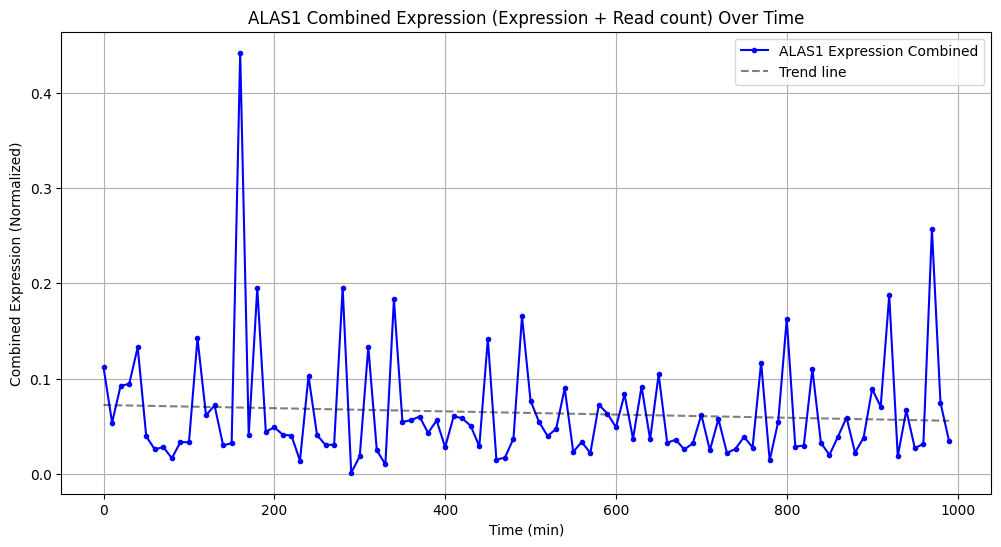

In [5]:
df_plot = df.iloc[::10].reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(df_plot['Time_min'], df_plot['Expression_combined'], marker='.', color='blue', label='ALAS1 Expression Combined')
z = np.polyfit(df_plot['Time_min'], df_plot['Expression_combined'], 1)
p = np.poly1d(z)
plt.plot(df_plot['Time_min'], p(df_plot['Time_min']), 'k--', alpha=0.5, label='Trend line')
plt.title('ALAS1 Combined Expression (Expression + Read count) Over Time')
plt.xlabel('Time (min)')
plt.ylabel('Combined Expression (Normalized)')
plt.legend()
plt.grid(True)
plt.savefig('alas_read_count_trends.png')
plt.show()

# Identify highest strain

In [7]:
highest_strain = df.loc[df['Expression_combined'].idxmax()]
print("\nStrain with highest combined expression:")
print(f"Strain: {highest_strain['Strain']}, Combined Expression: {highest_strain['Expression_combined']:.2f}")


Strain with highest combined expression:
Strain: confidential_restricted_data, Combined Expression: 0.80
